In [1]:
%matplotlib inline

In [2]:
# https://www.tensorflow.org/guide/keras/preprocessing_layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
from tensorflow import keras

import datetime

In [3]:
# Create a data augmentation stage with horizontal flipping, rotations, zooms
# data_augmentation = keras.Sequential(
#     [
#         preprocessing.RandomFlip("horizontal"),
#         preprocessing.RandomRotation(0.1),
#         preprocessing.RandomZoom(0.1),
#     ]
# )

# Create a model that includes the augmentation stage
input_shape = (64, 64, 3)
classes = 200
# inputs = keras.Input(shape=input_shape)
# Augment images
# x = data_augmentation(inputs)
# # Rescale image values to [0, 1]
# x = preprocessing.Rescaling(1.0 / 255)(x)
# Add the rest of the model
model = keras.applications.ResNet50(
    weights='imagenet', include_top=True, input_shape=input_shape, classes=classes
)
for layer in model.layers:
    layer.trainable = True

ValueError: If using `weights` as `"imagenet"` with `include_top` as true, `classes` should be 1000

In [5]:
# Load some data
TINY_IMAGENET_PATH = 'datasets/tiny-imagenet-200'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_iterator = train_datagen.flow_from_directory(
    f'{TINY_IMAGENET_PATH}/train', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 100000 images belonging to 200 classes.


x (32, 64, 64, 3)
y (32,)
probs (32, 200)
[[[0.4930717  0.15398714 0.12653616]
  [0.4930738  0.15398505 0.12653407]
  [0.49307588 0.15398295 0.12653197]
  ...
  [0.09010088 0.16160733 0.11730312]
  [0.0901637  0.16166806 0.11735757]
  [0.09022653 0.1617288  0.11741202]]

 [[0.49339464 0.1600613  0.13261032]
  [0.4933821  0.16004872 0.13259774]
  [0.49336952 0.16003616 0.13258518]
  ...
  [0.00972801 0.08423782 0.05178104]
  [0.00967775 0.08418755 0.05171611]
  [0.00962748 0.08413729 0.05165118]]

 [[0.5138873  0.18057412 0.1530625 ]
  [0.51387054 0.18055527 0.15304993]
  [0.5138537  0.18053642 0.15303735]
  ...
  [0.09153672 0.16604653 0.15745062]
  [0.09148645 0.16599627 0.15738569]
  [0.09143619 0.16594599 0.15732077]]

 ...

 [[0.513114   0.21324001 0.16348276]
  [0.5131223  0.21327353 0.1634995 ]
  [0.5131307  0.21330704 0.16351625]
  ...
  [0.2030166  0.13433887 0.06475616]
  [0.20301032 0.13433677 0.06475197]
  [0.20300403 0.13433468 0.06474778]]

 [[0.5056833  0.16738664 0.14117

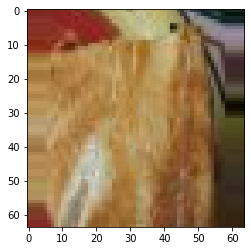

In [6]:
for i, (x, y) in enumerate(train_iterator):
    if i == 1:
        # print(x)
        print('x', x.shape)
        # print(y)
        print('y', y.shape)
        probabilities = model.call(tf.convert_to_tensor(x))
        print('probs', probabilities.shape)
        dim = 10
        plt.imshow((x[0] * 255).astype('uint8'))
        print(x[0])
#         plt.figure()

#         figure, axes = plt.subplots(dim, dim)
#         print(axes)
#         for i, axes_row in enumerate(axes):
#             for j, ax in enumerate(axes_row):
#                 ax.imshow(x[i * dim + j])
#         plt.show()
        break

In [7]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_iterator = val_datagen.flow_from_directory(
    f'{TINY_IMAGENET_PATH}/val', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 10000 images belonging to 1 classes.


In [8]:
# Save the weights using a checkpoint.
filepath = "weights/" + f"{datetime.datetime.now()}" + "/weights-improvement-{epoch:02d}-{acc:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='acc',
    mode='max',
    save_best_only=True
)
callbacks_list = [checkpoint]

In [ ]:
STEPS_PER_EPOCH = 100
VALIDATION_STEPS = 100
EPOCHS = 100

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.fit(
    train_iterator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    callbacks=callbacks_list,
#     validation_data=val_iterator,
#     validation_steps=VALIDATION_STEPS
)

Epoch 1/100
100/100 [==============================] - 205s 2s/step - loss: 7.1240 - acc: 0.0053
Epoch 2/100
100/100 [==============================] - 194s 2s/step - loss: 6.1174 - acc: 0.0050
Epoch 3/100
100/100 [==============================] - 190s 2s/step - loss: 5.6501 - acc: 0.0078
Epoch 4/100
100/100 [==============================] - 184s 2s/step - loss: 5.4520 - acc: 0.0119
Epoch 5/100
100/100 [==============================] - 182s 2s/step - loss: 5.2944 - acc: 0.0159
Epoch 6/100
100/100 [==============================] - 204s 2s/step - loss: 5.1946 - acc: 0.0188
Epoch 7/100
100/100 [==============================] - 230s 2s/step - loss: 5.1519 - acc: 0.0247
Epoch 8/100
100/100 [==============================] - 205s 2s/step - loss: 5.0764 - acc: 0.0266
Epoch 9/100
100/100 [==============================] - 209s 2s/step - loss: 5.0133 - acc: 0.0281
Epoch 10/100
100/100 [==============================] - 220s 2s/step - loss: 5.0115 - acc: 0.0347
Epoch 11/100
100/100 [=======

In [12]:
# model = keras.applications.ResNet50(
#     weights=None, include_top=True, input_shape=input_shape, classes=classes
# )
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

for batch_i, (x, y) in enumerate(train_iterator):    
    with tf.GradientTape() as tape:
#         print(x)
        probs = model.call(tf.convert_to_tensor(x), training=True)
#         print(probabilities.shape)
#         print(predictions.dtype)
#         print(y.dtype)
#         y = tf.cast(y, tf.int64)
#         print(y.dtype)
#         l = tf.keras.losses.sparse_categorical_crossentropy(y, probabilities)
        l = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y, probs))
#         print('y')
#         print(y)
        predictions = tf.argmax(probs, 1)
#         print('predictions')
        print(predictions)
        print('probs')
        print(probs)
        print(l)
#         print(tf.reduce_mean(predictions == y))
        gradients = tape.gradient(l, model.trainable_variables)
#         print(gradients[0][0][0][0])
        optimizer.apply_gradients(zip(gradients * 1000, model.trainable_variables))

tf.Tensor(
[125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125
 125 125 125 125 125 125 125 125 125 125 125 125 125 125], shape=(32,), dtype=int64)
probs
tf.Tensor(
[[0.00468092 0.00480742 0.00489825 ... 0.00528535 0.00488901 0.00489195]
 [0.00464835 0.00481394 0.0048884  ... 0.0052732  0.0048697  0.00488988]
 [0.00473733 0.00486978 0.00491996 ... 0.00520353 0.00492405 0.0048703 ]
 ...
 [0.00470506 0.00481662 0.0049167  ... 0.00520628 0.00491397 0.00491045]
 [0.00464217 0.00482561 0.00489362 ... 0.00531026 0.00484166 0.00486838]
 [0.00482032 0.00490528 0.0049256  ... 0.00514072 0.00493652 0.0049467 ]], shape=(32, 200), dtype=float32)
tf.Tensor(5.2981734, shape=(), dtype=float32)
tf.Tensor(
[125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125
 125 125 125 125 125 125 125 125 125 125 125 125 125 125], shape=(32,), dtype=int64)
probs
tf.Tensor(
[[0.00468735 0.00486574 0.00489959 ... 0.0052852  0.00489437 0.00489253]
 [0.0046489  0.0047882  0.004865

KeyboardInterrupt: 

In [ ]:
print('# of batches:', len(train_iterator))
print('batch size:', 32)

In [ ]:
# compute accuracy
# count = 0
tf_count = 0
for batch_i, (x, y) in enumerate(train_iterator):
    probabilities = model.call(tf.convert_to_tensor(x))
    predictions = tf.argmax(probabilities, 1)
    
    tf_count += tf.reduce_sum(tf.cast(predictions == y, tf.float32))
    if batch_i % 50 == 0:
        print('reduce_sum:', tf_count.numpy(), '/', (batch_i + 1) * 32)
        
print(tf_count / (len(train_iterator) * 32))
    
#     for i in range(len(predictions)):
#         if predictions[i] == y[i]:
#             count += 1
#     print('manual:', count, '/', (batch_i + 1) * 32)

In [ ]:
model_json = model.to_json()
with open("weights/model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# load in the saved model
WEIGHTS_NAME = 'weights-improvement-01-0.00.hdf5'
model.load_weights(f'weights/{WEIGHTS_NAME}')

In [ ]:
model.trainable_variables